In [7]:
# Import necessary libraries:-
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# Load datasets:-
train_data = pd.read_csv('C:\\Users\\karti\\OneDrive\\Desktop\\train.csv')
test_data = pd.read_csv('C:\\Users\\karti\\OneDrive\\Desktop\\test.csv')
gender_submission = pd.read_csv('C:\\Users\\karti\\OneDrive\\Desktop\\gender_submission.csv')

In [9]:
# Missing values:-
# Print missing values in the train dataset
print("Missing values in the train dataset:")
print(train_data.isnull().sum())
# Print missing values in the test dataset
print("\nMissing values in the test dataset:")
print(test_data.isnull().sum())
# Print missing values in the gender submission dataset
print("\nMissing values in the gender submission dataset:")
print(gender_submission.isnull().sum())

Missing values in the train dataset:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values in the test dataset:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Missing values in the gender submission dataset:
PassengerId    0
Survived       0
dtype: int64


In [10]:
# Remove rows with missing values:-
train_data_cleaned = train_data.dropna()
test_data_cleaned = test_data.dropna()
gender_submission_cleaned = gender_submission.dropna()

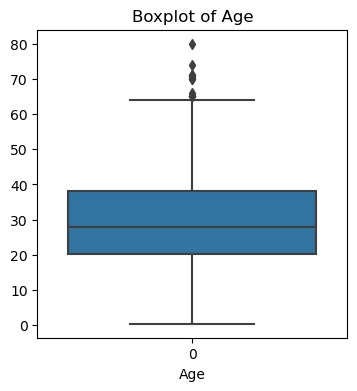

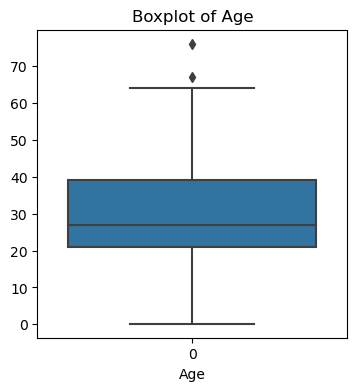

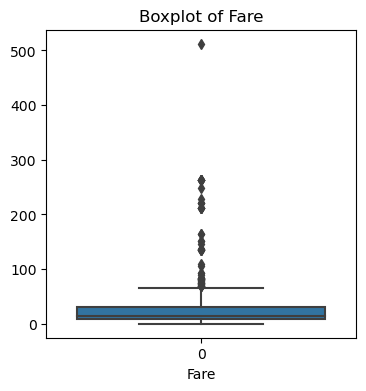

In [16]:
# Identify outliers
#train dataset:-
# Boxplot for Age
plt.figure(figsize=(4, 4))
sns.boxplot(train_data['Age'])
plt.xlabel('Age')
plt.title('Boxplot of Age')
plt.show()
# Test dataset:-
# Boxplot for Age
plt.figure(figsize=(4, 4))
sns.boxplot(data=test_data['Age'])
plt.xlabel('Age')
plt.title('Boxplot of Age')
plt.show()
# Boxplot for Fare 
plt.figure(figsize=(4, 4))
sns.boxplot(data=test_data['Fare'])
plt.xlabel('Fare')
plt.title('Boxplot of Fare')
plt.show()

In [12]:
# Handle outliers:-
# Remove rows with age outliers (outside 1.5 times the interquartile range) for train dataset
age_iqr_train = train_data['Age'].quantile(0.75) - train_data['Age'].quantile(0.25)
age_lower_train = train_data['Age'].quantile(0.25) - 1.5 * age_iqr_train
age_upper_train = train_data['Age'].quantile(0.75) + 1.5 * age_iqr_train
train_data = train_data[(train_data['Age'] >= age_lower_train) & (train_data['Age'] <= age_upper_train)]
# Remove rows with age outliers (outside 1.5 times the interquartile range) for test dataset
age_iqr_test = test_data['Age'].quantile(0.75) - test_data['Age'].quantile(0.25)
age_lower_test = test_data['Age'].quantile(0.25) - 1.5 * age_iqr_test
age_upper_test = test_data['Age'].quantile(0.75) + 1.5 * age_iqr_test
test_data = test_data[(test_data['Age'] >= age_lower_test) & (test_data['Age'] <= age_upper_test)]
# Remove rows with fare outliers (outside 1.5 times the interquartile range) for test dataset
fare_iqr_test = test_data['Fare'].quantile(0.75) - test_data['Fare'].quantile(0.25)
fare_lower_test = test_data['Fare'].quantile(0.25) - 1.5 * fare_iqr_test
fare_upper_test = test_data['Fare'].quantile(0.75) + 1.5 * fare_iqr_test
test_data = test_data[(test_data['Fare'] >= fare_lower_test) & (test_data['Fare'] <= fare_upper_test)]

In [13]:
# Verify the cleaned dataset:-
print("\nCleaned train dataset information:")
print(train_data.info())
print("\nCleaned test dataset information:")
print(test_data.info())


Cleaned train dataset information:
<class 'pandas.core.frame.DataFrame'>
Index: 703 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  703 non-null    int64  
 1   Survived     703 non-null    int64  
 2   Pclass       703 non-null    int64  
 3   Name         703 non-null    object 
 4   Sex          703 non-null    object 
 5   Age          703 non-null    float64
 6   SibSp        703 non-null    int64  
 7   Parch        703 non-null    int64  
 8   Ticket       703 non-null    object 
 9   Fare         703 non-null    float64
 10  Cabin        180 non-null    object 
 11  Embarked     701 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 71.4+ KB
None

Cleaned test dataset information:
<class 'pandas.core.frame.DataFrame'>
Index: 296 entries, 0 to 415
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       -------------